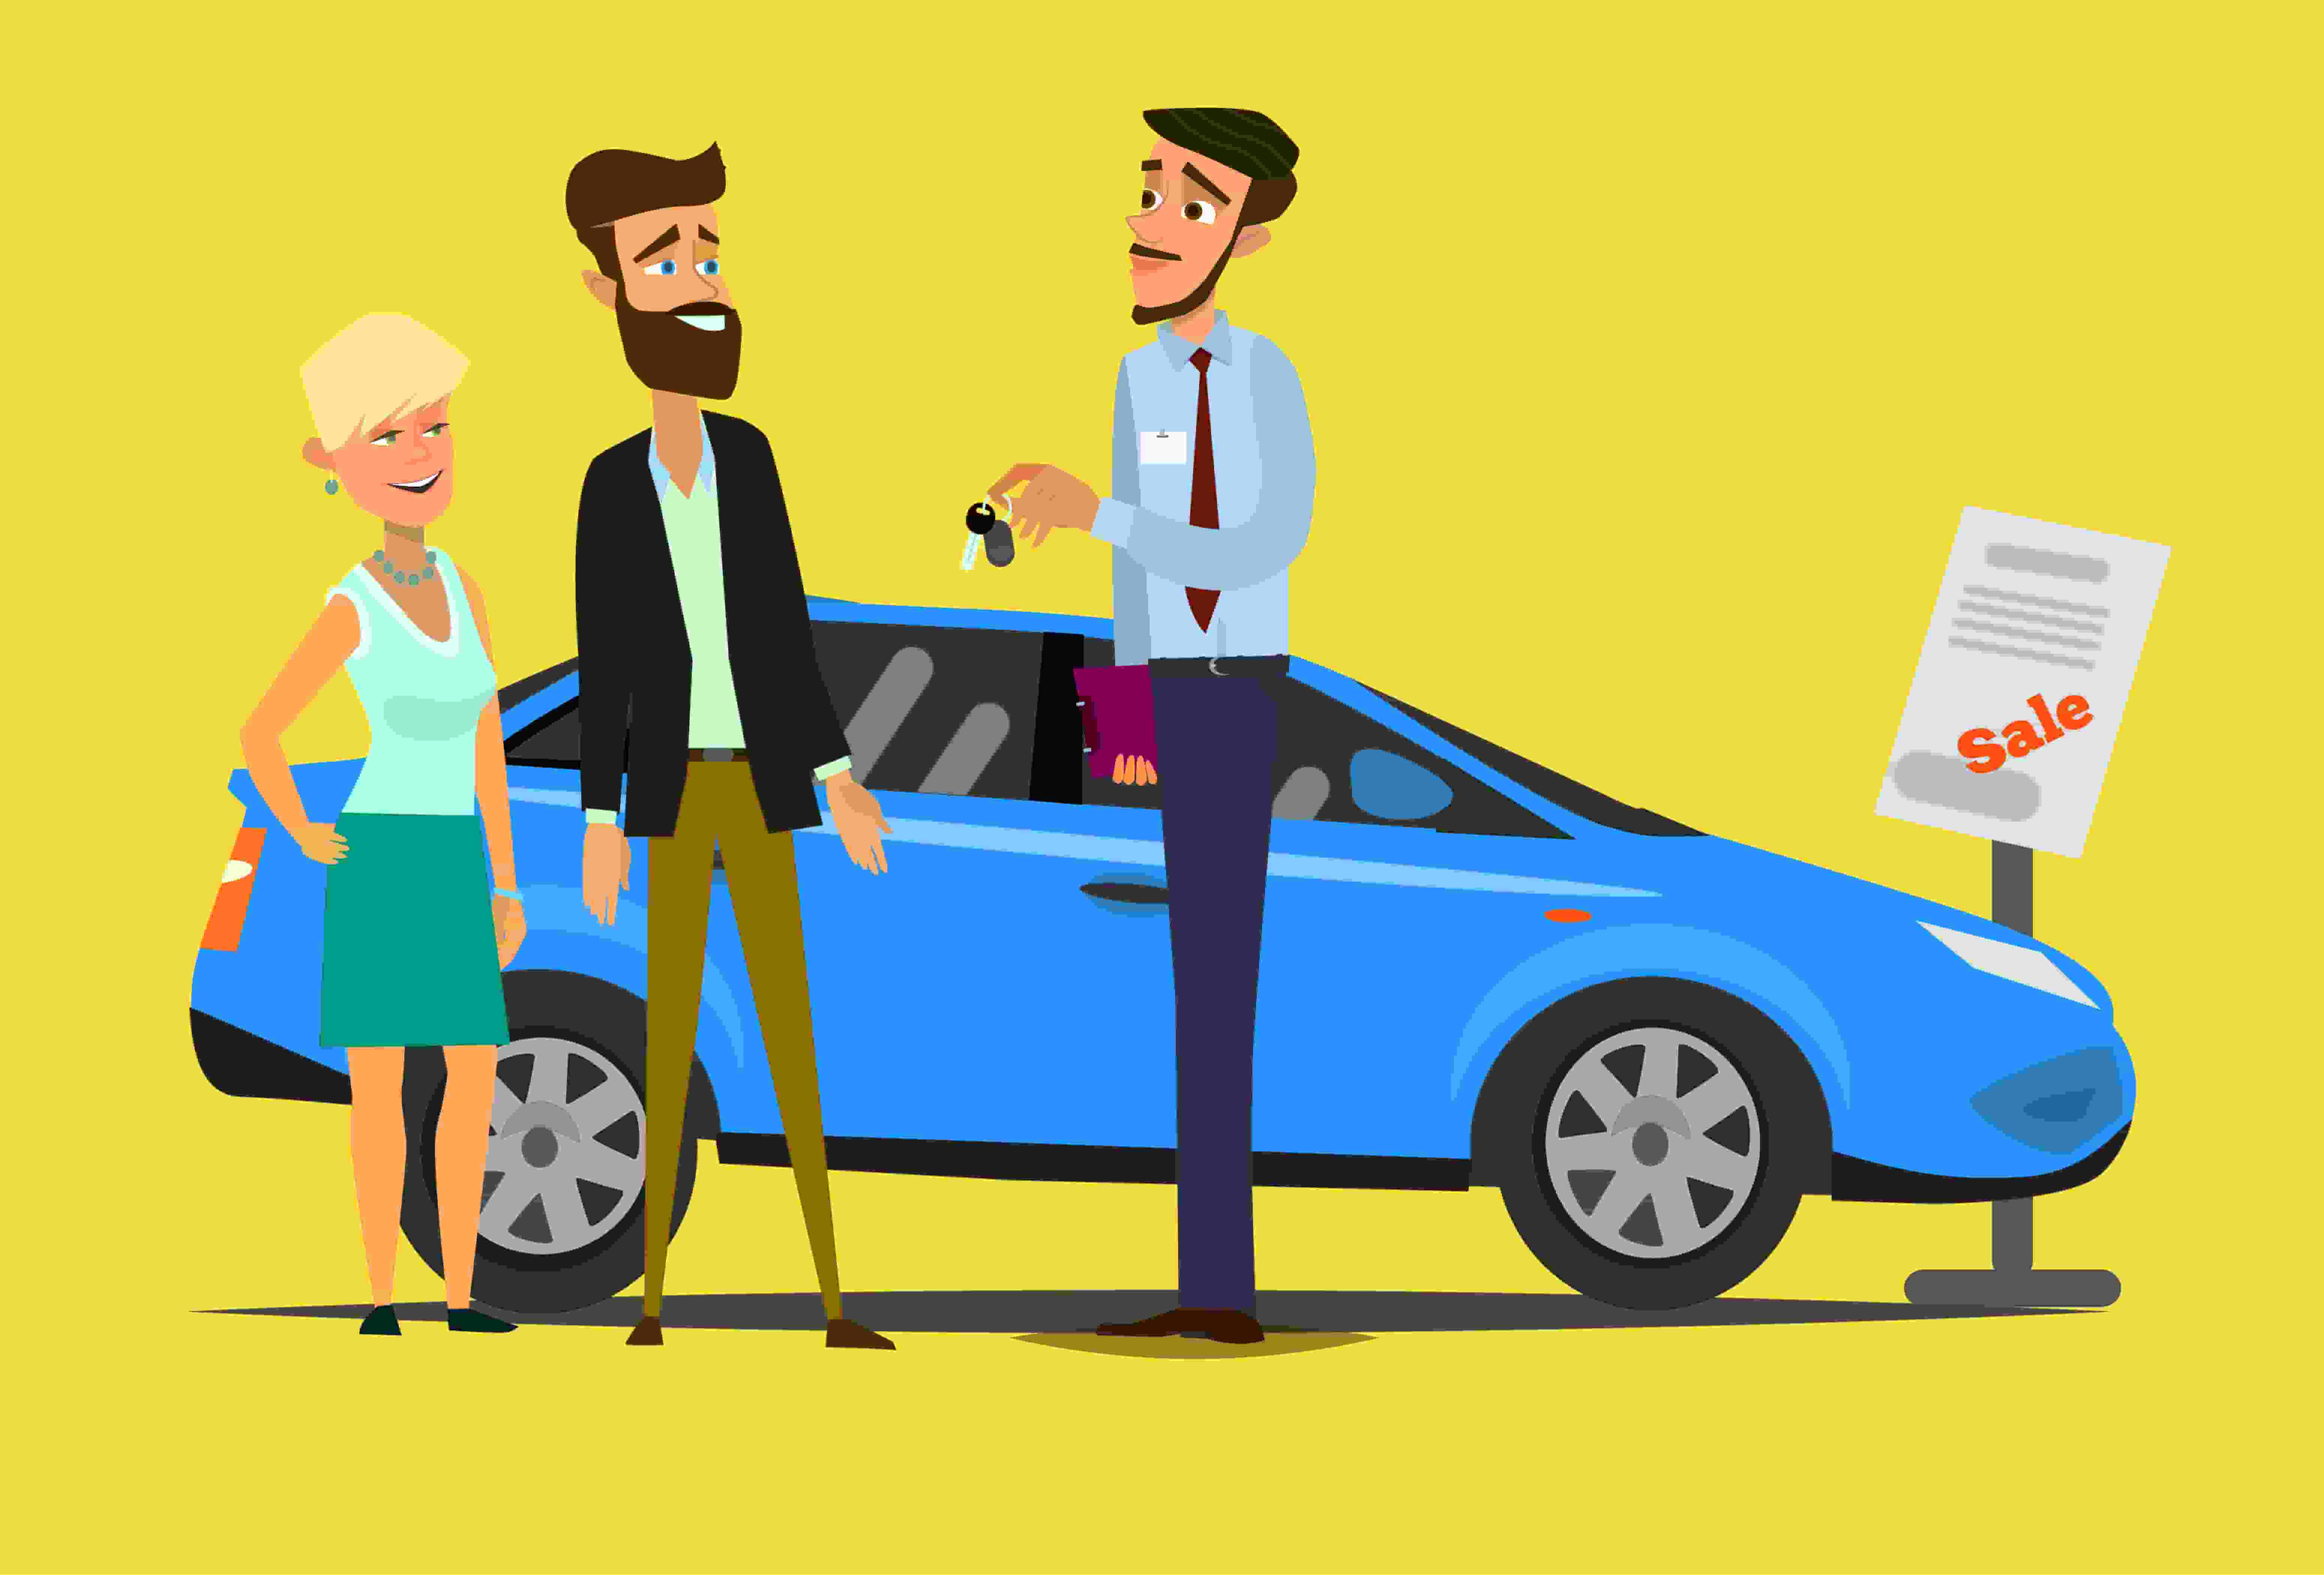

In [1]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\ARJUN\Downloads\Used_Car_Sheet.csv")

In [3]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

### Data Analysis

In [4]:
df.head() # checking first 5 rows

,Name,Location,Mfg_Year,Kilometers_Driven,Fuel_Type,Transmission,Owners,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,175000
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,1250000
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,450000
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,600000
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,1774000


In [5]:
print(df.shape) # checking size of the dataset

(6019, 8)


### Checking columns

In [6]:
df.columns

Index(['Name', 'Location', 'Mfg_Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owners', 'Price'],
      dtype='object')

### Dataframe Description:
1. Name: Name and brand model of the cars
2. Location : A particular location or position where car can sold.
3. Mfg_Year :  The production market classifies manufacturing years to specific vehicles.                                     
4. Kilometers_Driven  : The car is driven for particular distance.
6. Fuel_Type : Types of fuel is used in car.
7. Transmission : The mechanism by which power is transmitted from an engine to the axle in a motor vehicle.
8. Owners : The car owners numbers specifies used owners of cars.
9. Price : Price of the car that seller want to sell.

### Checking Target variable

<AxesSubplot:ylabel='Density'>

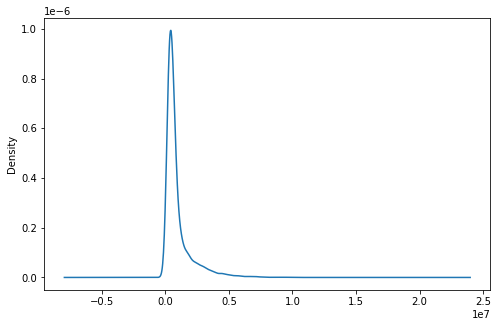

In [7]:
plt.figure(figsize = (8,5))
df.Price.plot(kind = 'kde')

#### From above graph we find that most of the car prices are lies in the range of approx 0 to 5 lakh

In [8]:
df.dtypes  # checking datatypes of the dataset

Name                 object
Location             object
Mfg_Year              int64
Kilometers_Driven     int64
Fuel_Type            object
Transmission         object
Owners               object
Price                 int64
dtype: object

In [9]:
df.select_dtypes(exclude = 'object').columns

Index(['Mfg_Year', 'Kilometers_Driven', 'Price'], dtype='object')

#### 'Name', 'Location', 'Fuel_Type', 'Transmission', 'Owners' are of object type data columns

#### 'Mfg_Year', 'Kilometers_Driven', 'Price' are of numerical type data columns

### Checking Null values of the dataset

In [10]:
df.isnull().sum()/len(df) # checking null values percentage of dataset

Name                 0.0
Location             0.0
Mfg_Year             0.0
Kilometers_Driven    0.0
Fuel_Type            0.0
Transmission         0.0
Owners               0.0
Price                0.0
dtype: float64

In [11]:
df.describe()  # checking overall summary of the dataset

,Mfg_Year,Kilometers_Driven,Price
count,6019.000000,6.019000e+03,6.019000e+03
mean,2013.358199,5.873838e+04,9.479468e+05
std,3.269742,9.126884e+04,1.118792e+06
min,1998.000000,1.710000e+02,4.400000e+04
25%,2011.000000,3.400000e+04,3.500000e+05
50%,2014.000000,5.300000e+04,5.640000e+05
75%,2016.000000,7.300000e+04,9.950000e+05
max,2019.000000,6.500000e+06,1.600000e+07


In [12]:
df.describe(include = 'all')  # checking overall statiscal summary of the dataset

,Name,Location,Mfg_Year,Kilometers_Driven,Fuel_Type,Transmission,Owners,Price
count,6019,6019,6019.000000,6.019000e+03,6019,6019,6019,6.019000e+03
unique,1876,11,NaN,NaN,5,2,4,NaN
top,Mahindra XUV500 W8 2WD,Mumbai,NaN,NaN,Diesel,Manual,First,NaN
freq,49,790,NaN,NaN,3205,4299,4929,NaN
mean,NaN,NaN,2013.358199,5.873838e+04,NaN,NaN,NaN,9.479468e+05
std,NaN,NaN,3.269742,9.126884e+04,NaN,NaN,NaN,1.118792e+06
min,NaN,NaN,1998.000000,1.710000e+02,NaN,NaN,NaN,4.400000e+04
25%,NaN,NaN,2011.000000,3.400000e+04,NaN,NaN,NaN,3.500000e+05
50%,NaN,NaN,2014.000000,5.300000e+04,NaN,NaN,NaN,5.640000e+05
75%,NaN,NaN,2016.000000,7.300000e+04,NaN,NaN,NaN,9.950000e+05


### Observations:
    
1. No null values present in the dataset
2. Outliers are present as their is difference between the mean and 50 percentile data.
3. Many of the data that should be in numerical format is in categorical format which would be needed to be converted

## Feature Engineering

In [13]:
df.head()

,Name,Location,Mfg_Year,Kilometers_Driven,Fuel_Type,Transmission,Owners,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,175000
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,1250000
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,450000
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,600000
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,1774000


#### As per dataset Kilometers_Driven and price are being converted into log as value having zeros in high number hence we can convert it into decimal by changing its unit type

In [14]:
df['Driven_in_Thousand_km'] = df['Kilometers_Driven']/1000
df['Price_in_Lakh'] = df['Price']/100000

In [15]:
df.head()

,Name,Location,Mfg_Year,Kilometers_Driven,Fuel_Type,Transmission,Owners,Price,Driven_in_Thousand_km,Price_in_Lakh
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,175000,72.00,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,1250000,41.00,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,450000,46.00,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,600000,87.00,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,1774000,40.67,17.74


In [16]:
df.drop(['Kilometers_Driven', 'Price'],axis = 1, inplace = True) # dropping similar meaning columns

In [17]:
df.head(2)

,Name,Location,Mfg_Year,Fuel_Type,Transmission,Owners,Driven_in_Thousand_km,Price_in_Lakh
0,Maruti Wagon R LXI CNG,Mumbai,2010,CNG,Manual,First,72.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,Diesel,Manual,First,41.0,12.50


### Extracting Brand and Model name

In [18]:
Brand = []
for i in df.Name:
    Brand.append(i.split()[0])

Model = []
for j in df.Name:
    Model.append(j.split()[1:3])

In [19]:
Model = [[' '.join(i)] for i in Model]
Model_final = []
for i in Model:
    Model_final.append(i[0])

In [20]:
df["Brand"] = Brand
df["Model"] = Model_final
df['Total_Years_of_Car'] = 2022 - df['Mfg_Year']  # adding total years of car

In [21]:
df.head()

,Name,Location,Mfg_Year,Fuel_Type,Transmission,Owners,Driven_in_Thousand_km,Price_in_Lakh,Brand,Model,Total_Years_of_Car
0,Maruti Wagon R LXI CNG,Mumbai,2010,CNG,Manual,First,72.00,1.75,Maruti,Wagon R,12
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,Diesel,Manual,First,41.00,12.50,Hyundai,Creta 1.6,7
2,Honda Jazz V,Chennai,2011,Petrol,Manual,First,46.00,4.50,Honda,Jazz V,11
3,Maruti Ertiga VDI,Chennai,2012,Diesel,Manual,First,87.00,6.00,Maruti,Ertiga VDI,10
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,Diesel,Automatic,Second,40.67,17.74,Audi,A4 New,9


In [22]:
#From above dataset we extracted Brand and Model Name from Name column hence we can drop it
# Also we extract Total years of car used hence we can drop Mfg_year.
df.drop(["Name","Mfg_Year"], axis = 1, inplace = True)
df.keys()

Index(['Location', 'Fuel_Type', 'Transmission', 'Owners',
       'Driven_in_Thousand_km', 'Price_in_Lakh', 'Brand', 'Model',
       'Total_Years_of_Car'],
      dtype='object')

In [23]:
df.dtypes  # checking datatypes for enchancing or extracting important details

Location                  object
Fuel_Type                 object
Transmission              object
Owners                    object
Driven_in_Thousand_km    float64
Price_in_Lakh            float64
Brand                     object
Model                     object
Total_Years_of_Car         int64
dtype: object

In [24]:
for i in df.columns:
    print(i, "column having ", df[i].nunique(), "unique values", "\n")  # train dataset

Location column having  11 unique values 

Fuel_Type column having  5 unique values 

Transmission column having  2 unique values 

Owners column having  4 unique values 

Driven_in_Thousand_km column having  3093 unique values 

Price_in_Lakh column having  1373 unique values 

Brand column having  31 unique values 

Model column having  689 unique values 

Total_Years_of_Car column having  22 unique values 



In [25]:
for i in df.select_dtypes(include = 'object').columns:
    print("--------------"+i+"---------------------",'\n' ,df[i].value_counts(), "\n")  # checking unique counts

--------------Location--------------------- 
 Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64 

--------------Fuel_Type--------------------- 
 Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64 

--------------Transmission--------------------- 
 Manual       4299
Automatic    1720
Name: Transmission, dtype: int64 

--------------Owners--------------------- 
 First             4929
Second             968
Third              113
Fourth & Above       9
Name: Owners, dtype: int64 

--------------Brand--------------------- 
 Maruti           1211
Hyundai          1107
Honda             608
Toyota            411
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
BMW               267
Audi              236
Tata        

## Exploratory Data Analysis

### Dropping Duplicate Values

In [26]:
print("Before dropping duplicates, size of df is",len(df))

df.drop_duplicates(keep = 'first', inplace = True)   # dropping duplicate values for improved dataset 

print("After dropping duplicates, size of df is",len(df))


Before dropping duplicates, size of df is 6019
After dropping duplicates, size of df is 6014


### Checking for Null values`

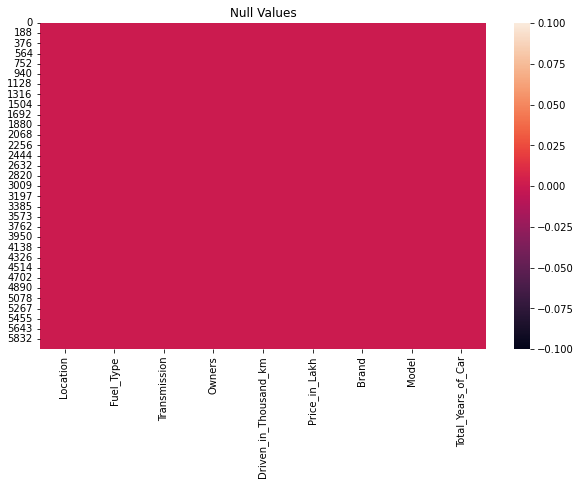

In [27]:
plt.figure(figsize=[10,6])
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()


<AxesSubplot:>

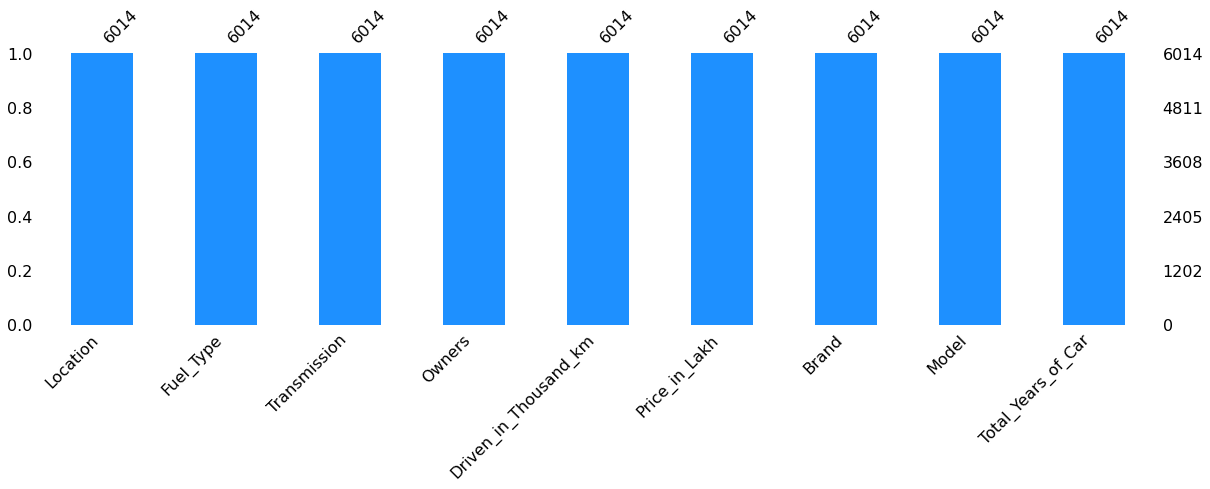

In [28]:
import missingno
missingno.bar(df, figsize = (20,5), color="dodgerblue")

### Dividing columns into object and numerical categories for easy visualization understandings

In [29]:
df_object = df.select_dtypes(include = 'object').columns  # object dataset columns
df_num = df.select_dtypes(exclude = 'object').columns  # numerical dataset columns

In [30]:
df_object  # checking object columns

Index(['Location', 'Fuel_Type', 'Transmission', 'Owners', 'Brand', 'Model'], dtype='object')

In [31]:
df_num  # checking non object columns

Index(['Driven_in_Thousand_km', 'Price_in_Lakh', 'Total_Years_of_Car'], dtype='object')

## Visualization

<AxesSubplot:xlabel='Location', ylabel='Price_in_Lakh'>

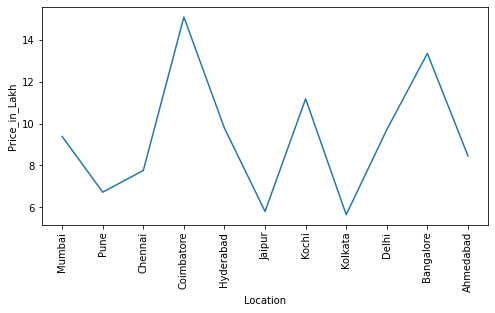

In [32]:
plt.figure(figsize=(8,4))
plt.xticks(rotation = 90)
sns.lineplot(x='Location', y='Price_in_Lakh', data=df, ci=None)
#plt.xticks(rotation = 90)

#### Observations:
    1. Location Coimbatore and Banglore having very high price values cars as compared to other locations.
    2. Pune, Jaipur and Kolkata having very less price values car as compared to other locations.

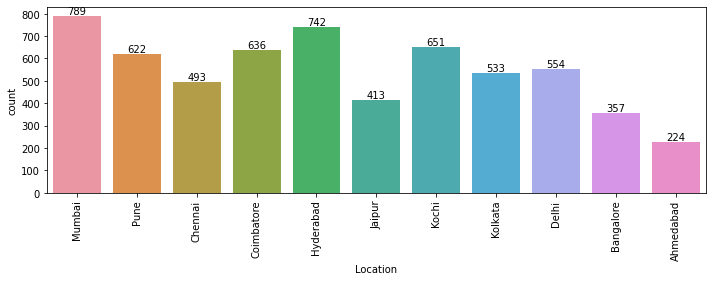

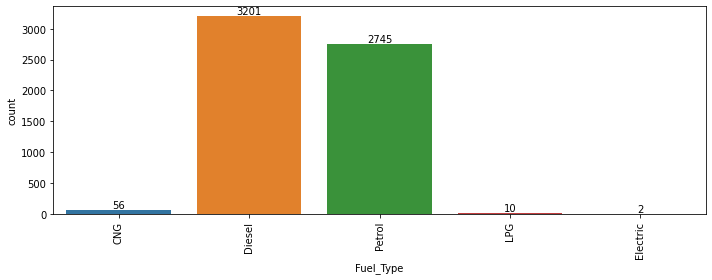

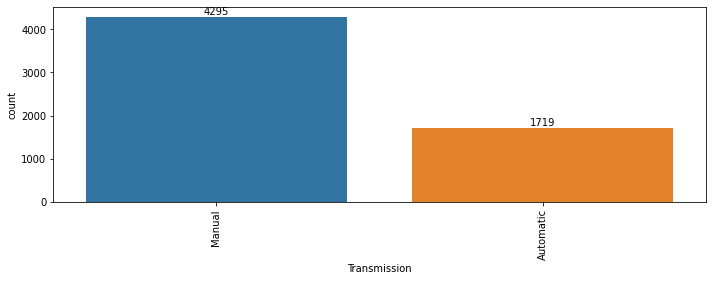

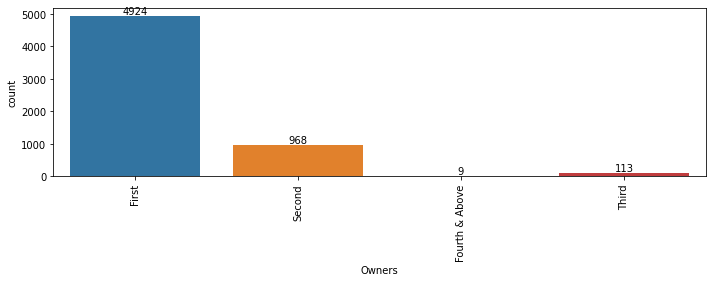

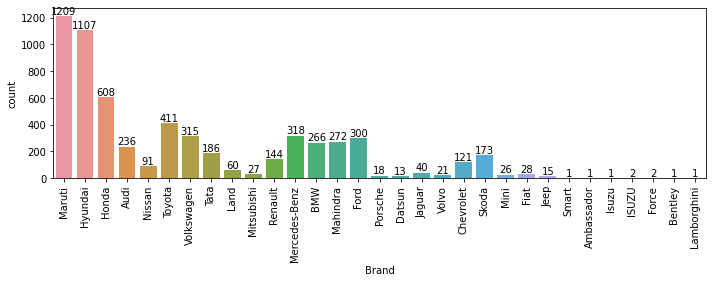

In [33]:
def countplot(x):
    df_counts = df[x].value_counts()
    plt.figure(figsize=(10,4))
    df_viz = sns.countplot(x = x, data = df)
    plt.xticks(rotation=90)
    plt.tight_layout()
    for j in df_viz.containers:
        df_viz.bar_label(j)


for i in list(['Location', 'Fuel_Type', 'Transmission', 'Owners', 'Brand']):
    countplot(i)

### Observations

 - Most of the seller are lies in the location Mumbai, Hyderabad, Coimbatore, Kochi, Pune as compared to other location.

 - Diesel and Petrol cars are more in the sell dataset.

 - Manual cars are more as compared to automatic cars.

 - First owners cars are more as per dataset.

 - Maruti and Hyundai brands are more in sell as compared to other brands.

## Price variation with different characteristics

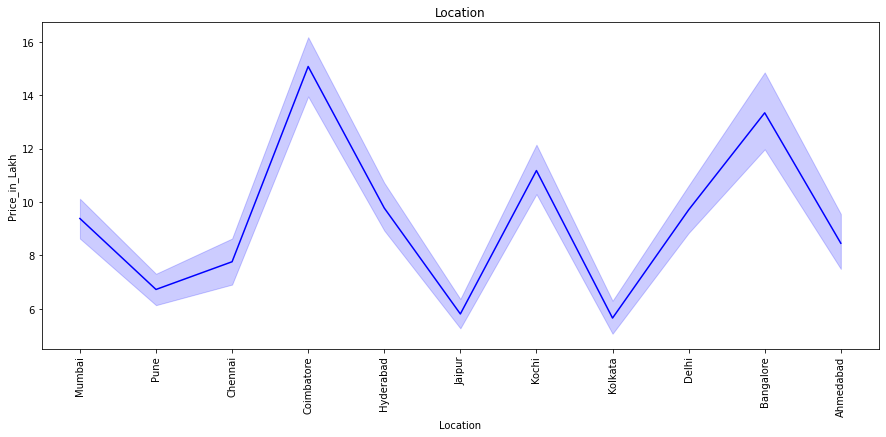

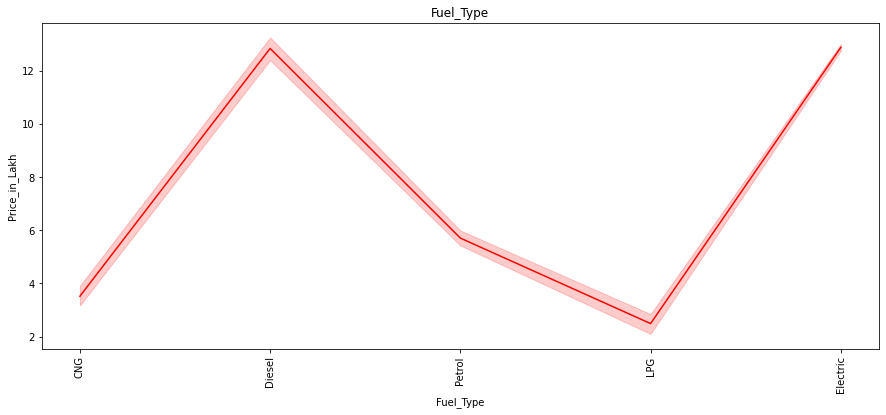

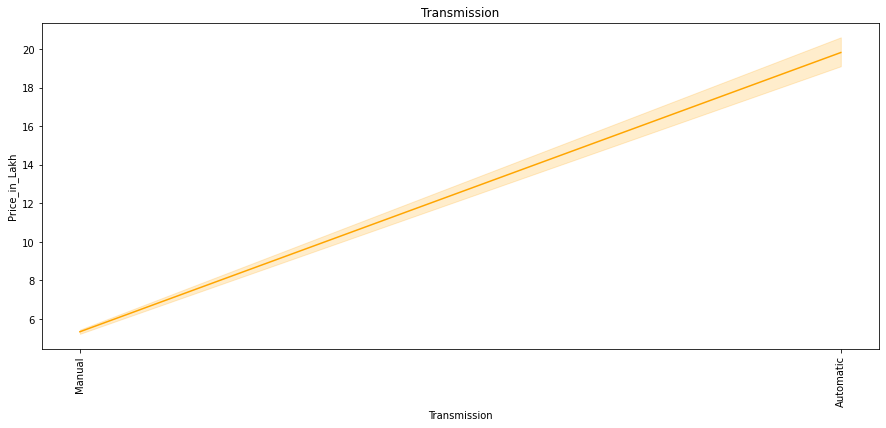

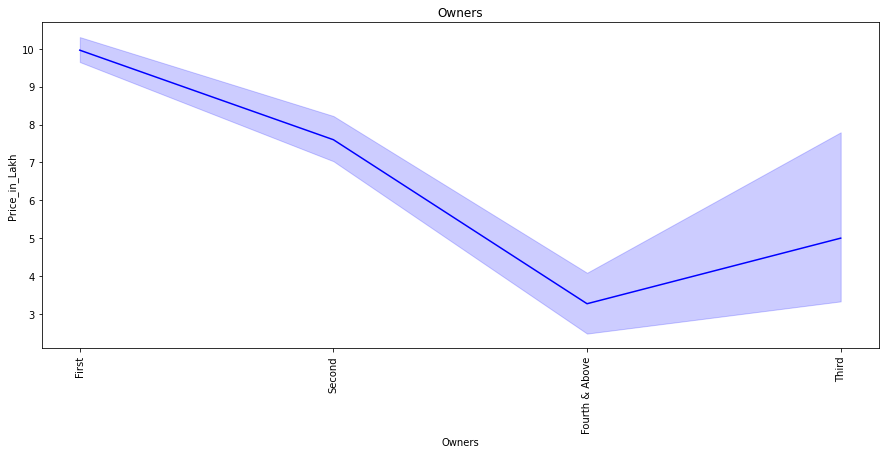

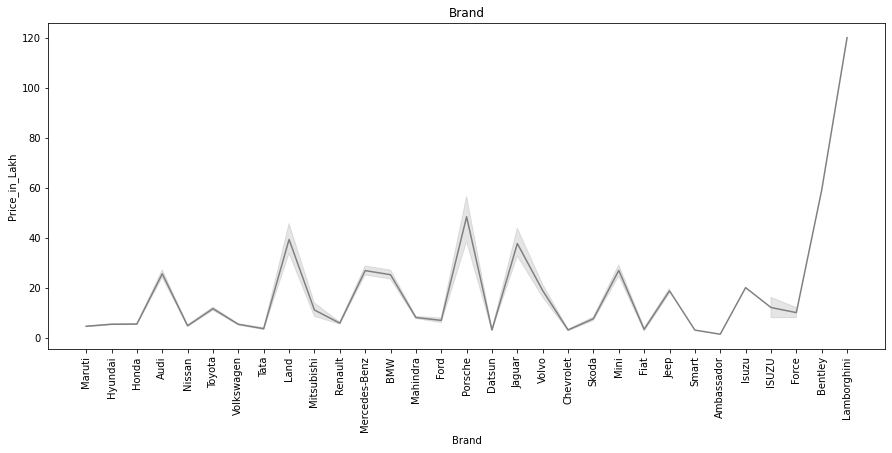

In [34]:
j = ['blue', 'red', 'orange', 'blue', 'grey']
for i,j in zip(df_object, j):
    plt.figure(figsize=(15,6))
    sns.lineplot(x= i ,y = 'Price_in_Lakh' ,data=df, color = j)
    plt.xticks(rotation = 90)
    plt.title(i)
    plt.show()

## Checking Overall of the Dataset by Pairplot

<Figure size 1080x1080 with 0 Axes>

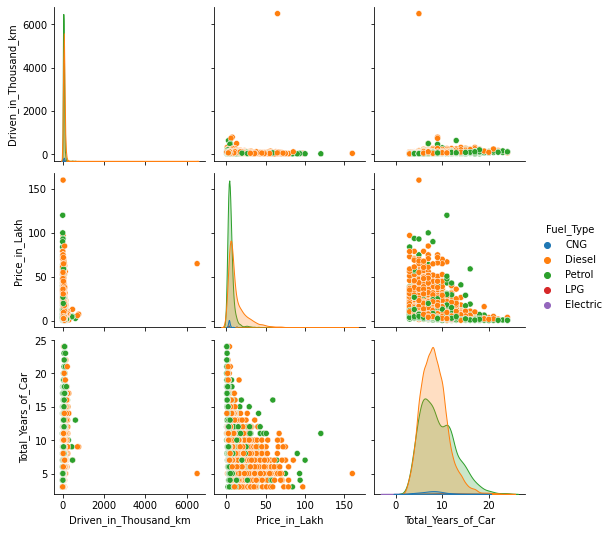

In [35]:
plt.figure(figsize = (15,15))
sns.pairplot(df, hue = 'Fuel_Type') 

#### Observations: Measured all analysis above are similar to pairplot.

### Converting objects dataset into numerical form we are using Ordinal Encoder

In [36]:
from sklearn.preprocessing import OrdinalEncoder
onc = OrdinalEncoder()

In [37]:
for i in df.select_dtypes(include = 'object').columns:
    df[i] = onc.fit_transform(df[i].values.reshape(-1,1))
     

In [38]:
df.head(1) # checking result

,Location,Fuel_Type,Transmission,Owners,Driven_in_Thousand_km,Price_in_Lakh,Brand,Model,Total_Years_of_Car
0,9.0,0.0,1.0,0.0,72.0,1.75,18.0,616.0,12


### Dealing with Outliers

If it was present, we could have used in the particular features

1. Zscore
2. Using percentile/quantile

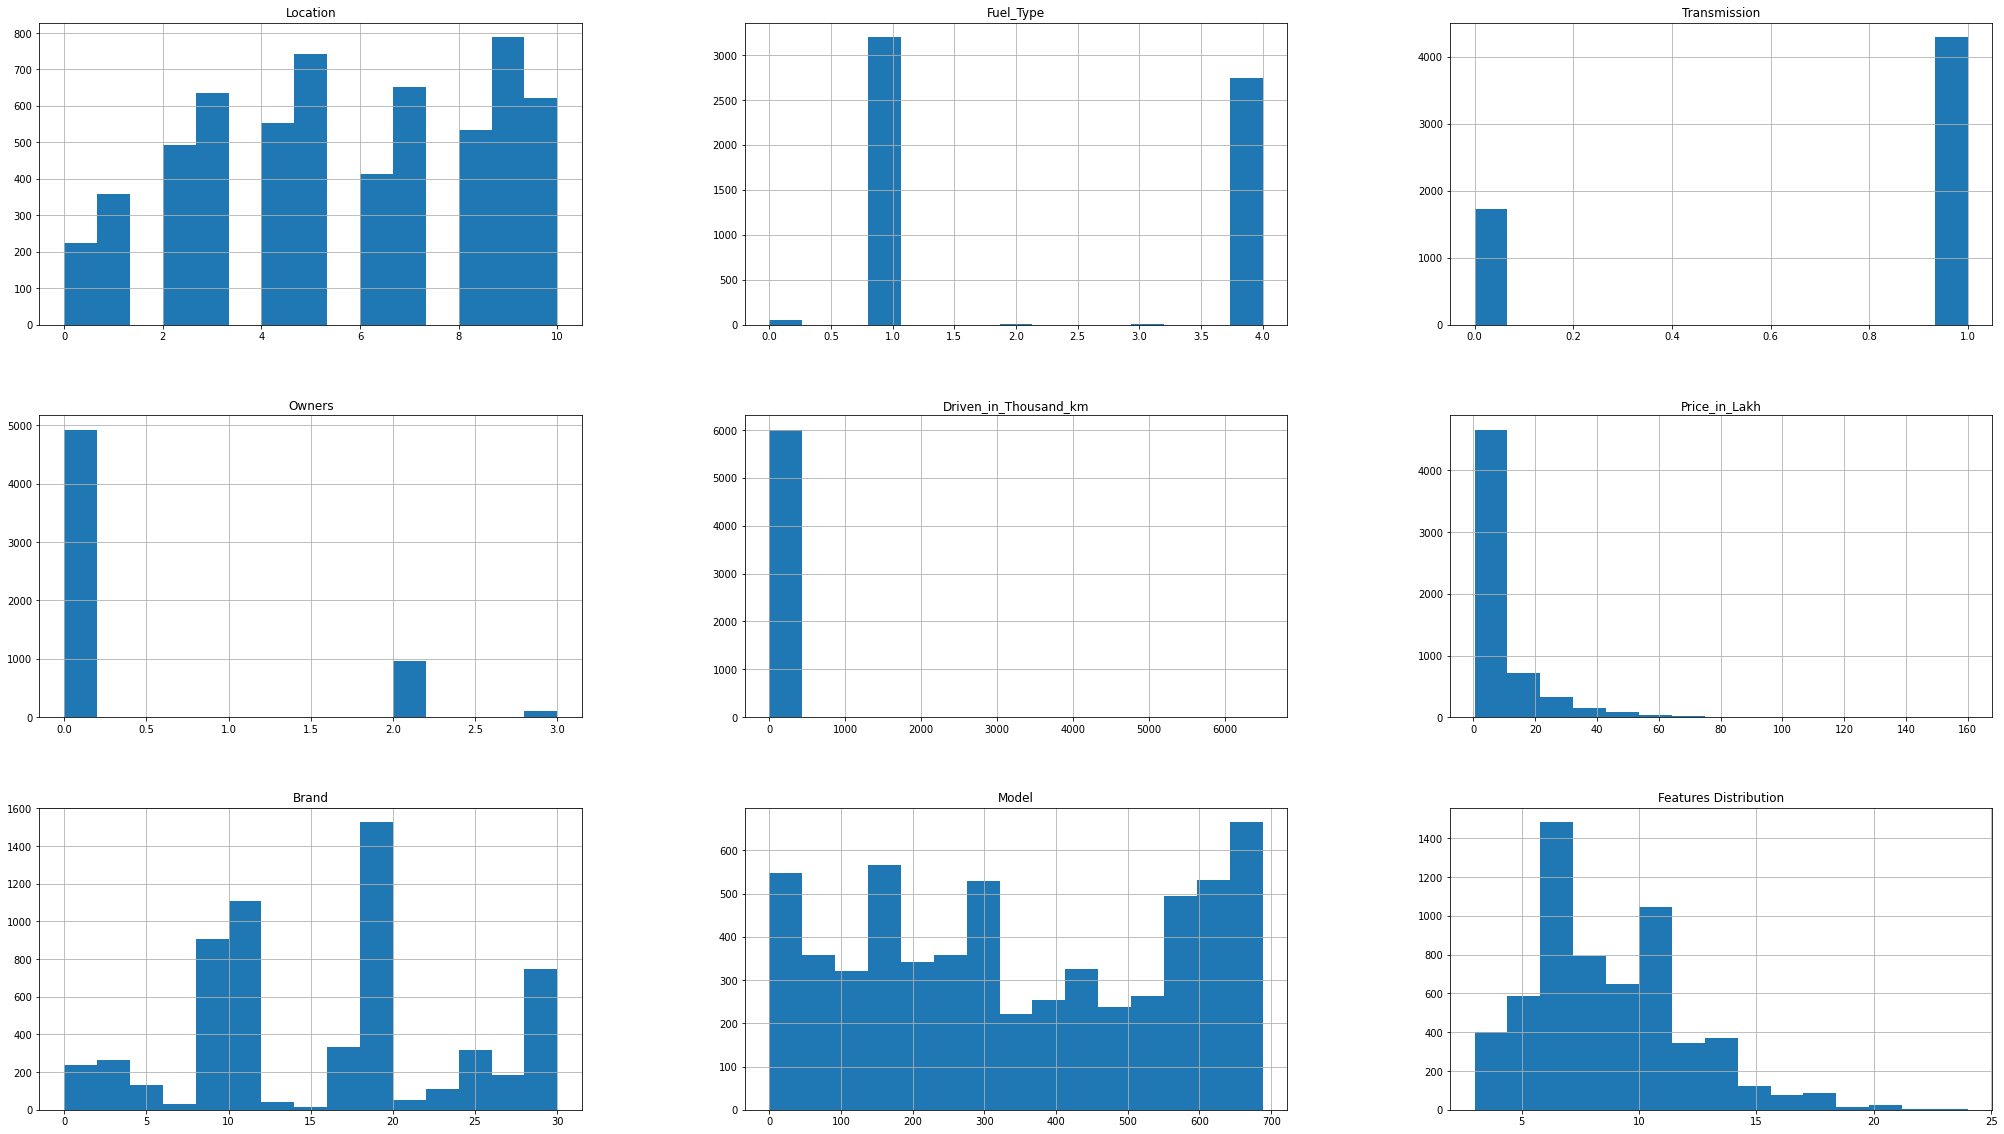

In [39]:
#checking for outliers
df.hist(figsize=(35,20),bins = 15)
plt.title("Features Distribution")
plt.show()

<AxesSubplot:>

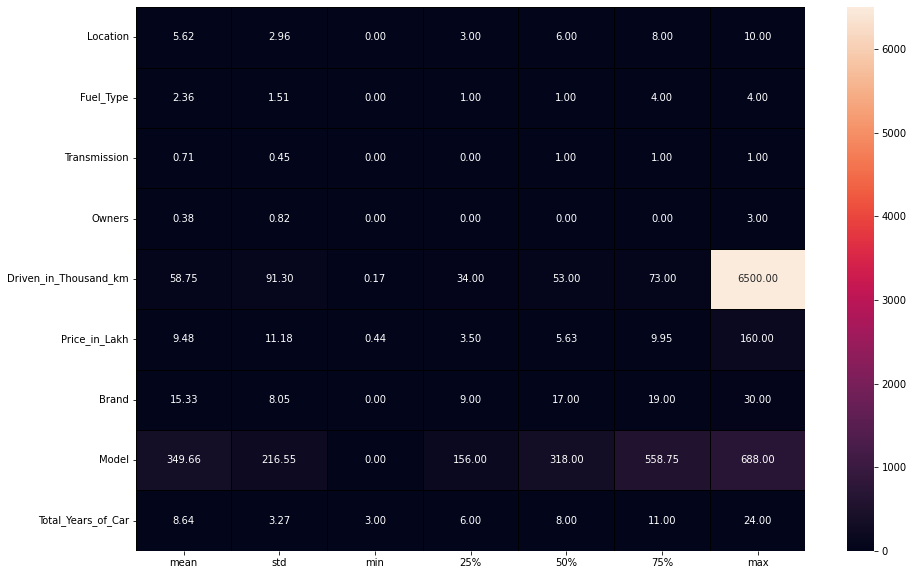

In [40]:
plt.figure(figsize = (15,10))
sns.heatmap(df.describe()[1:].transpose(), annot = True, linecolor='black', linewidths=0.5, fmt = '.2f')

#checking description visually

#### Observations

- Outliers are present as their are difference between the mean and 50 percentile data.

### Removing Outliers from the Dataset

In [41]:
from scipy.stats import zscore

z = np.abs(zscore(df))

# taking thresold value = 3
#np.where(z>3)

df_z = df[(z<3).all(axis = 1)]

In [42]:
print(df_z.shape)
print(df.shape)

(5714, 9)
(6014, 9)


In [43]:
percentage = round((6014 - 5714)/6014*100,2)
print(percentage, "Percentage of data loss in train dataset")  

4.99 Percentage of data loss in train dataset


### Removing Outliers with Interquartile Method

In [44]:
Q1 = df.quantile(.25)
Q3 = df.quantile(.75)
IQR = Q3 - Q1

In [45]:
df_IQR = df[~((df<(Q1 - 1.5*IQR)) | (df>(Q3 + 1.5*IQR))).any(axis = 1)]

In [46]:
df_IQR.shape

(4151, 9)

In [47]:
percentage = round((6014 - 4151)/6014*100,2)
print(percentage, "Percentage of data loss in train dataset")  

30.98 Percentage of data loss in train dataset


#### From above two methods of removing outliers we find that Zscore give lesser data loss percent hence we can use it. While Interquartile shows higher dataloss hence we can't consider it.

### Dealing with skewness/Obtaining a gaussian distribution



Checking if the distribution is normalisation through

1. Skew values

2. Box plot

3. Kolmogorov Smirnov test

4. Histogram

In [48]:
df.skew()

Location                 -0.132917
Fuel_Type                 0.154865
Transmission             -0.948276
Owners                    1.783160
Driven_in_Thousand_km    58.703786
Price_in_Lakh             3.338386
Brand                     0.110775
Model                     0.025885
Total_Years_of_Car        0.844977
dtype: float64

#### There are skewness in Driven_in_Thousand_km, Price_in_Lakh while rest of dataset are object types which convert by encoding            

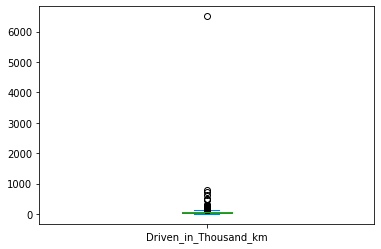

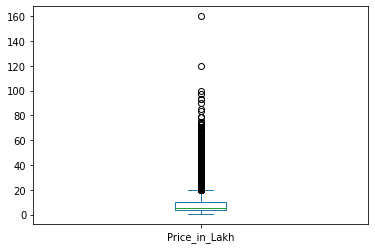

In [49]:
for i in list(['Driven_in_Thousand_km', 'Price_in_Lakh']):
    df[i].plot(kind = 'box')
    plt.show()

In [50]:
from scipy.stats import kstest, norm
for i in list(['Driven_in_Thousand_km', 'Price_in_Lakh']):
    ks_statistic, p_value = kstest(df[i], 'norm')
    print(i,"---------", ks_statistic, p_value)

Driven_in_Thousand_km --------- 0.9920309724562989 0.0
Price_in_Lakh --------- 0.910228368812249 0.0


#### If the observed data perfectly follow a normal distribution, the value of the KS statistic will be 0 But since its greater than 0.9, shows that there is need for normalisation.

In [51]:
#Splitting the indepedent and target variable in x and y
x= df_z.drop('Price_in_Lakh',axis=1)
y= df_z['Price_in_Lakh']

### Using Power Transformer method

In [52]:
from sklearn.preprocessing import PowerTransformer
pw = PowerTransformer('yeo-johnson')

In [53]:
x_check = x.copy()# making new variable from originalfor no disturbance in main dataset

In [54]:
x_check.head(1)

,Location,Fuel_Type,Transmission,Owners,Driven_in_Thousand_km,Brand,Model,Total_Years_of_Car
0,9.0,0.0,1.0,0.0,72.0,18.0,616.0,12


In [55]:
x_check['Driven_in_Thousand_km'] = pw.fit_transform(x_check['Driven_in_Thousand_km'].values.reshape(-1,1))
x_check['Driven_in_Thousand_km'].skew()

0.04441466661296438

In [56]:
x['Driven_in_Thousand_km'] = pw.fit_transform(x['Driven_in_Thousand_km'].values.reshape(-1,1))
x['Driven_in_Thousand_km'].skew()

0.04441466661296438

In [57]:
x.skew()  # now skewness are under acceptable zone

Location                -0.155134
Fuel_Type                0.138633
Transmission            -1.037183
Owners                   1.808623
Driven_in_Thousand_km    0.044415
Brand                    0.121506
Model                    0.036294
Total_Years_of_Car       0.612270
dtype: float64

### FEATURE SELECTION

Conditions for regression

No multicollinearity

No autocorrelation

Normal distribution data


### 1.CHECKING MULICOLLINARITY

Comparing features with features uding HeatMap-Pearsons correlation

Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together.

Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.

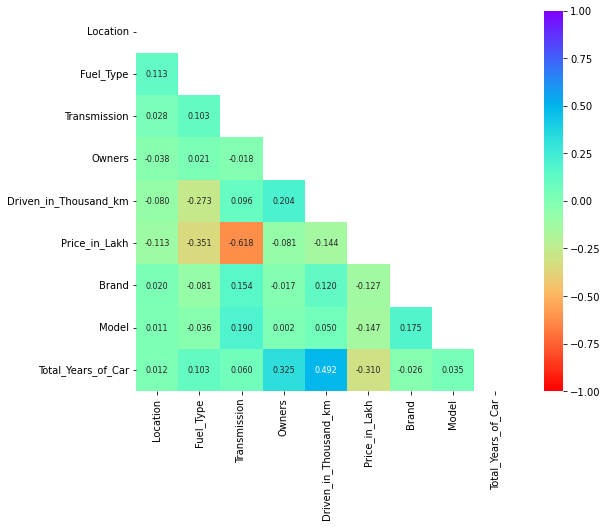

In [58]:
plt.style.use('seaborn-pastel')
upper_triangle = np.triu(df_z.corr())
plt.figure(figsize=(10,7))
sns.heatmap(df_z.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':8}, cmap="rainbow_r", mask=upper_triangle)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### Variance inflation factor

In [59]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [60]:
def calc_vif(x):
    
    vif = pd.DataFrame()
    vif['Variance'] = x.columns
    vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    return vif

In [61]:
calc_vif(x)  # checking VIF of numerical columns

,Variance,VIF Factor
0,Location,4.306790
1,Fuel_Type,4.272252
2,Transmission,3.859315
3,Owners,1.342835
4,Driven_in_Thousand_km,1.526596
5,Brand,4.282165
6,Model,3.650128
7,Total_Years_of_Car,8.745327


#### Total year of car show some multicollinearity but due to limited features in dataset we are not removing it.

### Checking Positive and Negative Correlation

<AxesSubplot:>

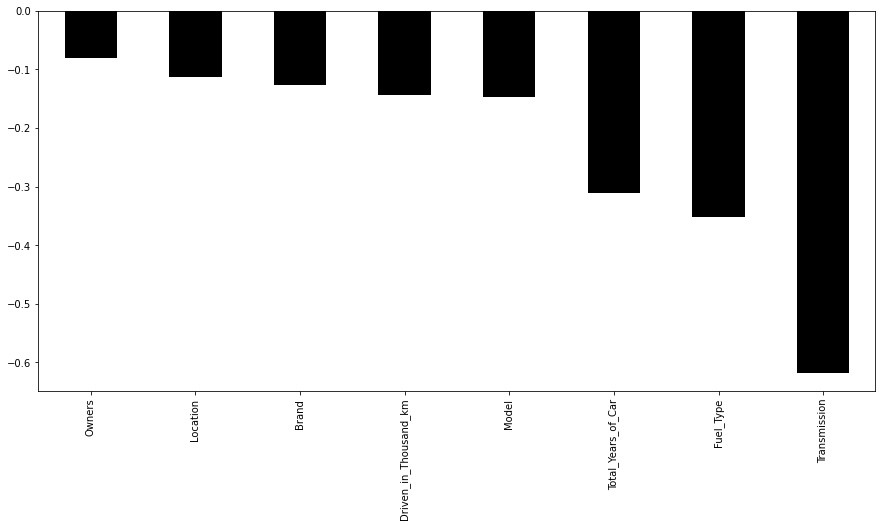

In [62]:
plt.figure(figsize = (15,7))
df_z.corr()['Price_in_Lakh'].sort_values(ascending = False).drop('Price_in_Lakh').plot(kind = 'bar', color = 'k')

In [63]:
df_z.corr()['Price_in_Lakh'].sort_values(ascending = False)

Price_in_Lakh            1.000000
Owners                  -0.080808
Location                -0.113498
Brand                   -0.126607
Driven_in_Thousand_km   -0.143650
Model                   -0.147304
Total_Years_of_Car      -0.310339
Fuel_Type               -0.351492
Transmission            -0.618146
Name: Price_in_Lakh, dtype: float64

### Feature selection using Basic Linear Regression Model

In [64]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',LinearRegression())
])

search = GridSearchCV(pipeline,
                      {'model__n_jobs':np.arange(1,10,1)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3)

search.fit(x,y)

search.best_params_

coefficients = search.best_estimator_.named_steps['model'].coef_


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END .................model__n_jobs=1;, score=-31.170 total time=   0.0s
[CV 2/5] END .................model__n_jobs=1;, score=-32.391 total time=   0.0s
[CV 3/5] END .................model__n_jobs=1;, score=-25.796 total time=   0.0s
[CV 4/5] END .................model__n_jobs=1;, score=-27.712 total time=   0.0s
[CV 5/5] END .................model__n_jobs=1;, score=-26.752 total time=   0.0s
[CV 1/5] END .................model__n_jobs=2;, score=-31.170 total time=   0.0s
[CV 2/5] END .................model__n_jobs=2;, score=-32.391 total time=   0.0s
[CV 3/5] END .................model__n_jobs=2;, score=-25.796 total time=   0.0s
[CV 4/5] END .................model__n_jobs=2;, score=-27.712 total time=   0.0s
[CV 5/5] END .................model__n_jobs=2;, score=-26.752 total time=   0.0s
[CV 1/5] END .................model__n_jobs=3;, score=-31.170 total time=   0.0s
[CV 2/5] END .................model__n_jobs=3;, s

In [65]:
importance = np.abs(coefficients)

In [66]:
pd.DataFrame({'columns' : x.keys(), 'importance': importance} )

,columns,importance
0,Location,0.540854
1,Fuel_Type,2.309869
2,Transmission,4.357363
3,Owners,0.039866
4,Driven_in_Thousand_km,0.593618
5,Brand,0.445940
6,Model,0.241050
7,Total_Years_of_Car,1.623697


Here we find that no feature has been discarded

## Checking autocorrelation

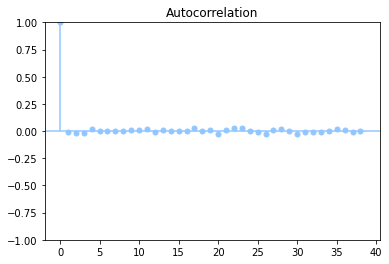

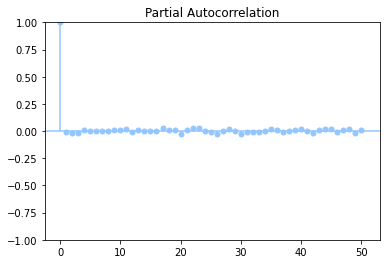

2.019749468550719

In [67]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from statsmodels.regression.linear_model import OLS
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
  
    
  
# Plot the autocorrelation for selling price data with 0.05 significance level
plot_acf(df['Price_in_Lakh'], alpha =1)
plt.show()
  
# Plot the partial autocorrelation for stock price data with 
# 0.05 significance level
plot_pacf(df['Price_in_Lakh'], alpha =1, lags=50)
plt.show()
  
"""
Code for Durbin Watson test
"""
dwt = pd.DataFrame(df['Price_in_Lakh'],columns=['Price_in_Lakh'])
  
X_dwt =np.arange(len(dwt[['Price_in_Lakh']]))
Y_dwt = np.asarray(dwt[['Price_in_Lakh']])
X_dwt = sm.add_constant(X_dwt)
  
# Fit the ordinary least square method.
ols_res = OLS(Y_dwt,X_dwt).fit()
# apply durbin watson statistic on the ols residual
durbin_watson(ols_res.resid)

#### Since the d value is above 2, the Null hypothesis is rejected. Hence First order auto correlation exist

### Checking Homoscedasticity of dataset

The residuals should have equal variance for linear regression

This can be found out by

1. Whites test
2. Scatter plot
3. Goldfeld Quant Test

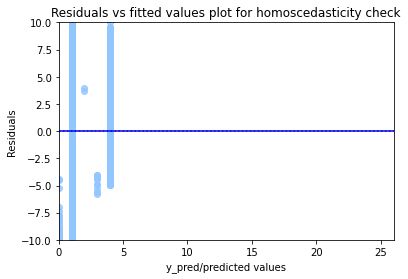

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y,random_state = 0,test_size=0.25)


from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
import seaborn as sns

regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_train)

p = sns.residplot(x["Fuel_Type"],y)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,26)
p = sns.lineplot([0,26],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

In [69]:
#Goldfeld Quandt Test
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
residuals = y_train-y_pred
test = sms.het_goldfeldquandt(residuals, X_train)
lzip(name, test)

[('F statistic', 0.9208761166921239), ('p-value', 0.9715222592274408)]

#### Since p value greater than 0.05 in Goldfeld Quandt Test, we can't reject it's null hypothesis

In [70]:
residuals = y_train-y_pred
residuals=residuals.tolist()

In [71]:
# Bartlett’s test 
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_train)


from scipy.stats import bartlett
test = bartlett(residuals,y_pred)
print(test)

BartlettResult(statistic=44.685846621487535, pvalue=2.3132343945655456e-11)


#### Power transform of dataset to bring Homeoscedasticity to dataset

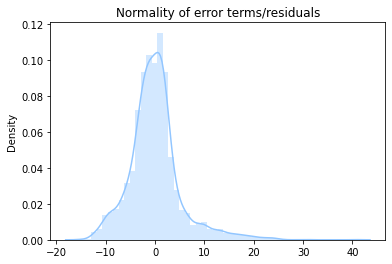

In [72]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

The residual terms are pretty much normally distributed for the number of test points we took. Remember the central limit theorem which says that as the sample size increases the distribution tends to be normal. A skew is also visible from the plot. It's very difficult to get perfect curves, distributions in real life data.

In [73]:
### Standard Scalling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x['Driven_in_Thousand_km'] = sc.fit_transform(x['Driven_in_Thousand_km'].values.reshape(-1,1)) 

x.head(2)

,Location,Fuel_Type,Transmission,Owners,Driven_in_Thousand_km,Brand,Model,Total_Years_of_Car
0,9.0,0.0,1.0,0.0,0.593906,18.0,616.0,12
1,10.0,1.0,1.0,0.0,-0.359803,10.0,164.0,7


### Principle Component Analysis

In [74]:
from sklearn.decomposition import PCA

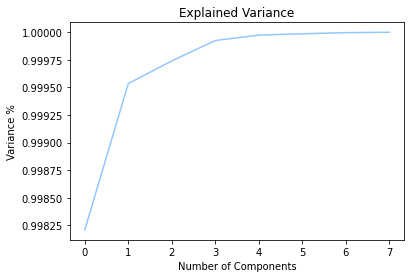

In [75]:
pca = PCA()
principleComponents = pca.fit_transform(x)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained Variance')
plt.show()

#### 4 components explain around 95% variance in data

### Selecting Kbest Features

In [76]:
from sklearn.feature_selection import SelectKBest, f_classif

In [77]:
bestfeat = SelectKBest(score_func = f_classif, k = 'all')
fit = bestfeat.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [78]:
fit = bestfeat.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(10,'Score'))

                 Feature     Score
2           Transmission  4.681590
7     Total_Years_of_Car  3.768128
1              Fuel_Type  1.890408
5                  Brand  1.317362
6                  Model  1.246838
4  Driven_in_Thousand_km  1.158665
3                 Owners  0.980556
0               Location  0.841045


#### Since all the dataset show some scores hence we are not dropping anyone of them

### Model Building

In [79]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import random

### Finding the best random state

In [80]:
max_acc = 0  # maximum accuracy 
max_rs = 0  # best random state value for which max accuracy is achieved

for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=i, test_size = .20)
    LR = LinearRegression()
    LR.fit(x_train, y_train)
    preddt = LR.predict(x_test)
    acc = r2_score(y_test, preddt) # accuracy score
    if acc>max_acc:
        max_acc = acc
        max_rs = i
        
print('Best accuracy is', max_acc, "on random state", max_rs)

Best accuracy is 0.581089840368417 on random state 56


In [81]:
LR=LinearRegression()
RR=Ridge(alpha=1e-2, normalize=True)
LasR=Lasso(alpha=1e-2, normalize=True, max_iter=1e5)
svr=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
DTR=DecisionTreeRegressor(criterion="poisson", random_state=111)
RFR=RandomForestRegressor(max_depth=2, max_features="sqrt")
KNR=KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')
GBR=GradientBoostingRegressor(loss='quantile', n_estimators=200, max_depth=5)
ABR=AdaBoostRegressor(n_estimators=300, learning_rate=1.05, random_state=42)
ETR=ExtraTreesRegressor(n_estimators=200, max_features='sqrt', n_jobs=6)
XGBR=XGBRegressor()
LGBR=LGBMRegressor()


models= []
models.append(('LinearRegression', LR))
models.append(('Ridge Regressor', RR))
models.append(('Lasso Regressor', LasR))
models.append(('DecisionTreeRegressor',DTR))
models.append(('RandomForestRegressor',RFR))
models.append(('KNeighborsRegressor',KNR))
models.append(('GradientBoostingRegressor',GBR))
models.append(('AdaBoostRegressor',ABR))
models.append(('ExtraTreesRegressor',ETR))
models.append(('XGBRegressor',XGBR))
models.append(('LGBMRegressor',LGBR))

In [82]:
Model= []
score= []
cvs=[]
difference=[]
RMSE=[]

****************************************** LinearRegression ********************************************************


LinearRegression()


R2 Score is: 58.10898403684169


Cross Validation Score: 53.74487739779752


R2 Score - Cross Validation Score is 4.364106639044174
RMSE Score is: 5.003014845003427


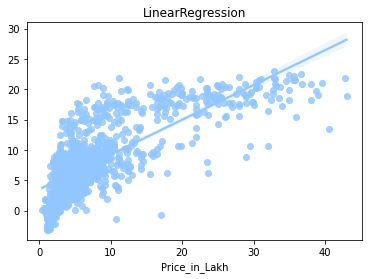

****************************************** Ridge Regressor ********************************************************


Ridge(alpha=0.01, normalize=True)


R2 Score is: 58.08702192404718


Cross Validation Score: 53.745034170868244


R2 Score - Cross Validation Score is 4.341987753178934
RMSE Score is: 5.004326133072852


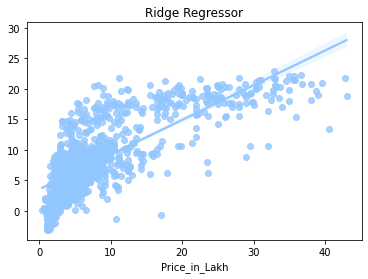

****************************************** Lasso Regressor ********************************************************


Lasso(alpha=0.01, max_iter=100000.0, normalize=True)


R2 Score is: 54.88492633419091


Cross Validation Score: 50.70400523568648


R2 Score - Cross Validation Score is 4.180921098504427
RMSE Score is: 5.191970071183411


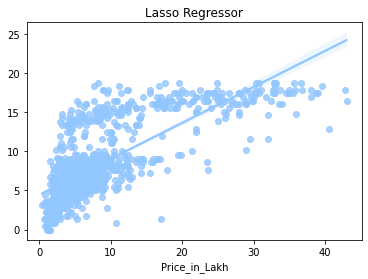

****************************************** DecisionTreeRegressor ********************************************************


DecisionTreeRegressor(criterion='poisson', random_state=111)


R2 Score is: 38.92507552403608


Cross Validation Score: 45.254096063144246


R2 Score - Cross Validation Score is -6.329020539108164
RMSE Score is: 6.040916241847974


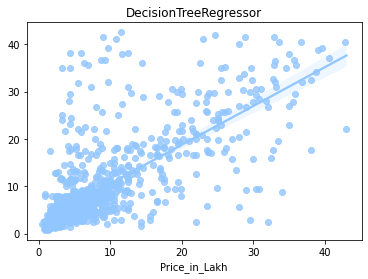

****************************************** RandomForestRegressor ********************************************************


RandomForestRegressor(max_depth=2, max_features='sqrt')


R2 Score is: 52.89115889704632


Cross Validation Score: 45.589803922622544


R2 Score - Cross Validation Score is 7.301354974423774
RMSE Score is: 5.305454021665919


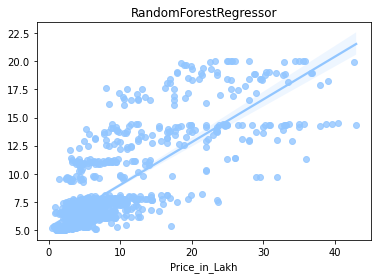

****************************************** KNeighborsRegressor ********************************************************


KNeighborsRegressor(algorithm='kd_tree', n_neighbors=2)


R2 Score is: 87.48296367049456


Cross Validation Score: 86.47677455875105


R2 Score - Cross Validation Score is 1.0061891117435096
RMSE Score is: 2.734778149445429


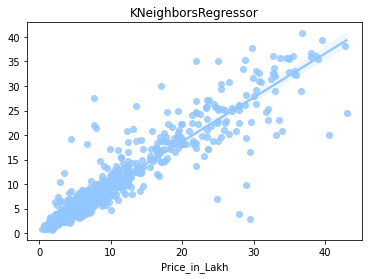

****************************************** GradientBoostingRegressor ********************************************************


GradientBoostingRegressor(loss='quantile', max_depth=5, n_estimators=200)


R2 Score is: 70.6587958854092


Cross Validation Score: 64.20358598920927


R2 Score - Cross Validation Score is 6.455209896199932
RMSE Score is: 4.187070864512415


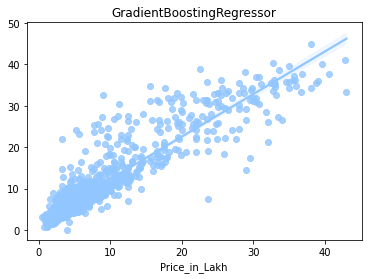

****************************************** AdaBoostRegressor ********************************************************


AdaBoostRegressor(learning_rate=1.05, n_estimators=300, random_state=42)


R2 Score is: 50.37712301134033


Cross Validation Score: 31.542690674535017


R2 Score - Cross Validation Score is 18.834432336805314
RMSE Score is: 5.445180929186994


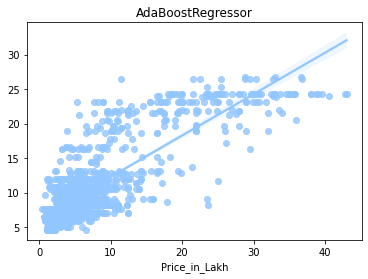

****************************************** ExtraTreesRegressor ********************************************************


ExtraTreesRegressor(max_features='sqrt', n_estimators=200, n_jobs=6)


R2 Score is: 87.01259752007002


Cross Validation Score: 83.85499499059371


R2 Score - Cross Validation Score is 3.157602529476307
RMSE Score is: 2.7856881367056787


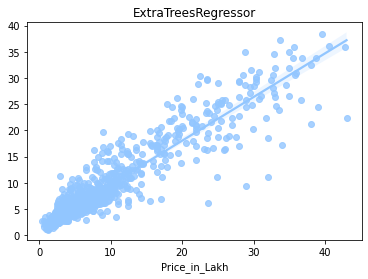

****************************************** XGBRegressor ********************************************************


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)


R2 Score is: 91.46094985892191


Cross Validation Score: 91.10746417247633


R2 Score - Cross Validation Score is 0.3534856864455804
RMSE Score is: 2.2587914063478958


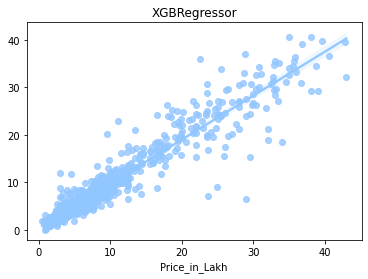

****************************************** LGBMRegressor ********************************************************


LGBMRegressor()


R2 Score is: 90.14183243081149


Cross Validation Score: 89.12198837798812


R2 Score - Cross Validation Score is 1.0198440528233732
RMSE Score is: 2.426998136798322


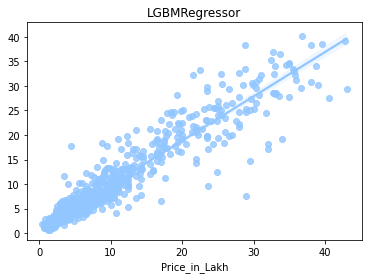

In [538]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 56, test_size = .20)

for name, model in models:
    print('******************************************',name,'********************************************************')
    
    print('\n')
    Model.append(name)
    
    # Training the model
    model.fit(x_train, y_train) #computer learing
    
    print(model)
    
     # Predicting y_test
    pred = model.predict(x_test)  #testing
    
    print('\n') 
    
    # R2 score
    r2 = r2_score(y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    score.append(r2)
    print('\n')
    
    # Cross Validation Score
    cv_score = (cross_val_score(model,x,y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    cvs.append(cv_score)
    print('\n')
    
    # Result of r2 score minus cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)
    difference.append(result)
    
     # RMSE - a lower RMSE score is better than a higher one
    rmse = mean_squared_error(y_test, pred, squared=False)
    print("RMSE Score is:", rmse)
    RMSE.append(rmse)
    
    #plots created
    sns.regplot(y_test,pred)
    plt.title(name)
    plt.show()

In [540]:
result = pd.DataFrame({'Model': Model, 'r2score': score,'Cross_val_score': cvs,'RMSE score':RMSE,'Difference between cv score and cross_val score':difference})
result

,Model,r2score,Cross_val_score,RMSE score,Difference between cv score and cross_val score
0,LinearRegression,58.108984,53.744877,5.003015,4.364107
1,Ridge Regressor,58.087022,53.745034,5.004326,4.341988
2,Lasso Regressor,54.884926,50.704005,5.191970,4.180921
3,DecisionTreeRegressor,38.925076,45.254096,6.040916,-6.329021
4,RandomForestRegressor,52.891159,45.589804,5.305454,7.301355
5,KNeighborsRegressor,87.482964,86.476775,2.734778,1.006189
6,GradientBoostingRegressor,70.658796,64.203586,4.187071,6.455210
7,AdaBoostRegressor,50.377123,31.542691,5.445181,18.834432
8,ExtraTreesRegressor,87.012598,83.854995,2.785688,3.157603
9,XGBRegressor,91.460950,91.107464,2.258791,0.353486


### Hyperparameter tuning of XGB Regressor

In [543]:
param = {'booster' : ['gbtree','dart','gblinear'],
              'importance_type' : ['gain','split'],
              'n_estimators' : [100,200,500],
              'eta' : [0.001, 0.01, 0.1]
             }
GSCV = GridSearchCV(XGBRegressor(), param, cv=5)
GSCV.fit(x_train,y_train)

In [ ]:
GSCV.best_params_

## Final Model XGB Regressor

In [549]:
final_model = XGBRegressor(booster='gbtree', eta=0.1, importance_type='gain', n_estimators=500)

At random state 58 model giving best accuracy score 

R2 Score:-  91.12973255504855


--------------------------------------
Mean squared error:-  4.925504986058744
Mean absolute error:-  1.1391381090438795
Root Mean squared error:- 2.2193478740519126


Text(0.5, 1.0, 'LGBMRegressor()')

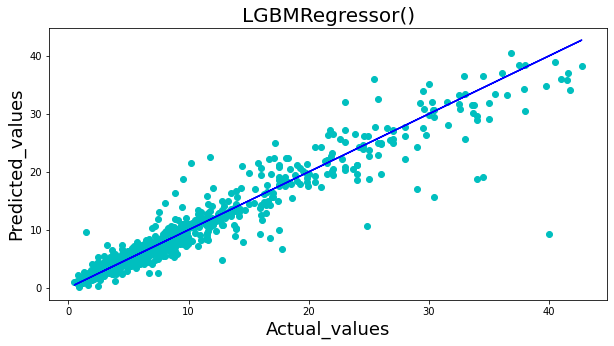

In [551]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 58)
final_model.fit(x_train, y_train)
pred_train = final_model.predict(x_train)
pred_test = final_model.predict(x_test)
print("At random state", 58 , "model giving best accuracy score","\n")
Train_accuracy = r2_score(pred_train, y_train)
Test_accuracy = r2_score(pred_test, y_test)

print('R2 Score:- ', Test_accuracy*100)
print("\n")
print('--------------------------------------')
print('Mean squared error:- ', mean_squared_error(pred_test, y_test) )
print('Mean absolute error:- ', mean_absolute_error(pred_test, y_test) )
print('Root Mean squared error:-',np.sqrt(mean_squared_error(pred_test, y_test)))
        
plt.figure(figsize = (10, 5))
plt.scatter(x = y_test, y = pred_test, color = 'c')
plt.plot(y_test, y_test, color = 'b')
plt.xlabel('Actual_values', fontsize= 18 )
plt.ylabel('Predicted_values', fontsize = 18)
plt.title(str(model), fontsize = 20)

### 

### Cross Val Score

In [552]:
cross_val_score(final_model, x, y, cv = 5).mean()

0.9126692612016647

### Deploy Model

In [553]:
import pickle

filename = "Used_Car_Price.pkl"
pickle.dump(final_model, open(filename, 'wb'))

### Loading Model

In [554]:
load = pickle.load(open('Used_Car_Price.pkl', 'rb'))
result = load.score(x_test, y_test)
print(result)

0.9182635688728165


In [555]:
conclusion = pd.DataFrame()
conclusion['Predicted Car price'] = np.array(final_model.predict(x_test))
conclusion['Actual Car price'] = np.array(y_test)

In [556]:
conclusion.sample(10)

,Predicted Car price,Actual Car price
572,5.000850,5.53
320,10.908600,12.00
469,19.478558,22.00
418,1.605081,1.70
587,3.547194,3.25
390,2.884743,3.00
824,9.103998,8.75
1132,6.827775,6.00
1023,11.494095,12.25
588,5.339522,5.00
